In [130]:
import os
import json
import pandas as pd
import numpy as np

In [45]:
def load_all_questions(dir_path):
    judgement_files = []
    
    all_questions = []
    for file_path in os.listdir(dir_path):
        if not file_path.endswith(".jsonl"):
            continue
        full_file_path = os.path.join(dir_path, file_path)
        judgement_files.append(full_file_path)
        data = pd.read_json(full_file_path, lines=True)
        data_pd = data[["question_id", "model_1", "model_2", "judge"]].copy()
        data_pd.rename(columns={"model_1": "model_2", "model_2": "model_1"}, inplace=True)
        data_pd["conv"] = data["games"].map(lambda x: x[1])
        data_pd["id"] = data.apply(
            lambda row: f'{row["question_id"]}_{row["model_2"]}_{row["model_1"]}', 
            axis=1
        )
        print(f"Loading filepath: {file_path}, total questions: {data_pd.shape[0]}")
        all_questions.append(data_pd)

    all_questions = pd.concat(all_questions, axis=0, ignore_index=True)
    print(f"Joined all questions: {all_questions.shape[0]}")
    return all_questions

### Building questions for pairwise comparison

In [68]:
dir_path = "data/brain-hard-v0.1/model_judgment/gpt-4o-falcon/"
all_questions = load_all_questions(dir_path)
all_questions.to_json("data/brain-hard-v0.1/model_judgment/gpt-4o-falcon-family.json", orient='records', lines=True)

Loading filepath: falcon-7b-base_falcon-7b-int8.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-base_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-int8.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-base_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-int8.jsonl, total questions: 395
Joined all questions: 4740


In [46]:
dir_path = "data/brain-hard-v0.1/model_judgment/qwen-2.5-7b-base/"
all_questions = load_all_questions(dir_path)
all_questions = all_questions.rename(
    columns = {"question_id": "old_question_id", "id": "question_id", "conv": "turns"}
)
all_questions["category"] = "brain-hard-v0.1"
all_questions["cluster"] = "Judge"
all_questions.to_json("data/brain-hard-v0.1/model_judgment/qwen-2.5-7b-family-questions.json", orient='records', lines=True)
all_questions.head()

Loading filepath: qwen-2.5-7b-int4_qwen-2.5-7b-base.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-base_qwen-2.5-7b-int4.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-base_qwen-2.5-7b-int8.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-int8_qwen-2.5-7b-int4.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-int8_qwen-2.5-7b-awq.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-int4_qwen-2.5-7b-awq.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-awq_qwen-2.5-7b-base.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-awq_qwen-2.5-7b-int8.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-int4_qwen-2.5-7b-int8.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-int8_qwen-2.5-7b-base.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-base_qwen-2.5-7b-awq.jsonl, total questions: 395
Loading filepath: qwen-2.5-7b-awq_qwen-2.5-7b-int4.jsonl, total questions: 395
Joined all questions: 4740


,old_question_id,model_2,model_1,judge,turns,question_id,category,cluster
0,0,qwen-2.5-7b-int4,qwen-2.5-7b-base,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",0_qwen-2.5-7b-base_qwen-2.5-7b-int4,brain-hard-v0.1,Judge
1,1,qwen-2.5-7b-int4,qwen-2.5-7b-base,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",1_qwen-2.5-7b-base_qwen-2.5-7b-int4,brain-hard-v0.1,Judge
2,2,qwen-2.5-7b-int4,qwen-2.5-7b-base,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",2_qwen-2.5-7b-base_qwen-2.5-7b-int4,brain-hard-v0.1,Judge
3,5,qwen-2.5-7b-int4,qwen-2.5-7b-base,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",5_qwen-2.5-7b-base_qwen-2.5-7b-int4,brain-hard-v0.1,Judge
4,7,qwen-2.5-7b-int4,qwen-2.5-7b-base,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",7_qwen-2.5-7b-base_qwen-2.5-7b-int4,brain-hard-v0.1,Judge


In [44]:
processed_questions = pd.read_json("datasets/final_dataser_filtered-v1.json")
processed_questions.head()

,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world,context_complete,answer,tag,source,meta_info,prompt,default_answer,model_answer,row-id
2,2,3,2,2,2,3,4,3,Earthworm tunnels help plants by aerating the ...,multiple_choice,allenai/ai2_arc,{'id_in_dataset': 'OHAT_2009_5_9'},Earthworms live underground in the soil. As th...,Earthworm tunnels loosen the soil so plant roo...,Earthworm tunnels help plants by aerating the ...,2
3,2,2,2,3,3,2,5,1,"To temporarily seal a broken window, you can u...",physical_reasoning,ybisk/piqa,None,How can I temporarily seal a broken window?,Tape a sheet of heavy plastic over the hole.,"To temporarily seal a broken window, you can u...",3
7,2,2,2,2,2,2,5,1,"To clean earbuds, gently remove any detachable...",physical_reasoning,ybisk/piqa,None,How to clean earbuds,"Take a small, damp cloth or paper towel and ge...","To clean earbuds, gently remove any detachable...",7
8,1,2,1,2,1,2,5,1,"To remove the skin from tomatoes, blanch them ...",physical_reasoning,ybisk/piqa,None,To remove skin from tomatoes for cooking the p...,Blanch the tomato in boiling water followed by...,"To remove the skin from tomatoes, blanch them ...",8
9,2,2,2,2,3,2,4,1,"To make breakfast cheesecakes, you can follow ...",physical_reasoning,ybisk/piqa,None,how to make breakfast cheesecakes,Whisk 1/2 cup each softened cream cheese and l...,"To make breakfast cheesecakes, you can follow ...",9


In [41]:
!ls data/brain-hard-v0.1/model_judgment/

falcon-7b-base		   gpt-4o-qwen			 qwen-7b-markup-gpt
falcon-7b-markup-gpt	   gpt-4o-qwen-7b-family-2.json  qwen-7b-markup-gpt-2
gpt-4o-falcon		   gpt-4o-qwen-7b-family.json
gpt-4o-falcon-family.json  qwen-2.5-7b-base


In [48]:
dir_path = "data/brain-hard-v0.1/model_judgment/falcon-7b-base/"
all_questions = load_all_questions(dir_path)
all_questions = all_questions.rename(
    columns = {"question_id": "old_question_id", "id": "question_id", "conv": "turns"}
)
all_questions["category"] = "brain-hard-v0.1"
all_questions["cluster"] = "Judge"
all_questions.to_json("data/brain-hard-v0.1/model_judgment/falcon-7b-family-questions.json", orient='records', lines=True)
all_questions.head()

Loading filepath: falcon-7b-base_falcon-7b-int8.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-base_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-int8.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-base_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-awq.jsonl, total questions: 395
Loading filepath: falcon-7b-awq_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-int8_falcon-7b-int4.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-base.jsonl, total questions: 395
Loading filepath: falcon-7b-int4_falcon-7b-int8.jsonl, total questions: 395
Joined all questions: 4740


,old_question_id,model_2,model_1,judge,turns,question_id,category,cluster
0,0,falcon-7b-base,falcon-7b-int8,falcon-7b-base,"[{'role': 'system', 'content': 'Please act as ...",0_falcon-7b-int8_falcon-7b-base,brain-hard-v0.1,Judge
1,1,falcon-7b-base,falcon-7b-int8,falcon-7b-base,"[{'role': 'system', 'content': 'Please act as ...",1_falcon-7b-int8_falcon-7b-base,brain-hard-v0.1,Judge
2,2,falcon-7b-base,falcon-7b-int8,falcon-7b-base,"[{'role': 'system', 'content': 'Please act as ...",2_falcon-7b-int8_falcon-7b-base,brain-hard-v0.1,Judge
3,5,falcon-7b-base,falcon-7b-int8,falcon-7b-base,"[{'role': 'system', 'content': 'Please act as ...",5_falcon-7b-int8_falcon-7b-base,brain-hard-v0.1,Judge
4,7,falcon-7b-base,falcon-7b-int8,falcon-7b-base,"[{'role': 'system', 'content': 'Please act as ...",7_falcon-7b-int8_falcon-7b-base,brain-hard-v0.1,Judge


### Markup stats functions

In [131]:
import pandas as pd
from collections import defaultdict
from tabulate import tabulate

# 1. Create mirrored comparisons for consistency check
def create_mirror_comparisons(df):
    """
    mirror = df.copy()
    # Swap model names and reverse verdicts
    
    mirror['model_1'], mirror['model_2'] = mirror['model_2'], mirror['model_1']
    mirror['verdict'] = mirror['verdict'].replace({
        '[[A>B]]': '[[B>A]]',
        '[[B>A]]': '[[A>B]]',
        '[[A>>B]]': '[[B>>A]]',
        '[[B>>A]]': '[[A>>B]]',
        '[[A=B]]': '[[A=B]]'
    })
    """
    # Create a string key instead of list for hashing
    df['comparison_key'] = df.apply(
        lambda x: f"{x['question_id']}_{min(x['model_1'], x['model_2'])}_{max(x['model_1'], x['model_2'])}", 
        axis=1
    )
    return df

from collections import defaultdict

def calculate_statistics(df):
    stats = {
        'total_comparisons': len(df),
        'consistent_pairs': 0,
        'inconsistent_pairs': 0,
        'verdict_counts': df['verdict'].value_counts().to_dict(),
        'model_win_rates': defaultdict(lambda: {
            'wins': 0,
            'losses': 0,
            'ties': 0,
            'strong_wins': 0,    # [[A>>B]] or [[B>>A]]
            'weak_wins': 0,      # [[A>B]] or [[B>A]]
            'draws': 0           # [[A=B]]
        }),
        'model_matchups': defaultdict(lambda: defaultdict(lambda: {
            'wins': 0,
            'losses': 0,
            'ties': 0,
            'total': 0
        }))
    }

    # Count model performance
    for _, row in df.iterrows():
        model_a = row['model_1']
        model_b = row['model_2']
        verdict = row['verdict']
        
        # Update matchup stats
        stats['model_matchups'][model_a][model_b]['total'] += 1
        stats['model_matchups'][model_b][model_a]['total'] += 1
        
        if '>>' in verdict:  # Strong win
            if 'A>>' in verdict:
                winner, loser = model_a, model_b
                stats['model_win_rates'][winner]['strong_wins'] += 1
            else:
                winner, loser = model_b, model_a
                stats['model_win_rates'][winner]['strong_wins'] += 1
            stats['model_win_rates'][winner]['wins'] += 1
            stats['model_win_rates'][loser]['losses'] += 1
            
            # Update matchup specific stats
            stats['model_matchups'][winner][loser]['wins'] += 1
            stats['model_matchups'][loser][winner]['losses'] += 1
            
        elif '>' in verdict:  # Weak win
            if 'A>' in verdict:
                winner, loser = model_a, model_b
            else:
                winner, loser = model_b, model_a
            stats['model_win_rates'][winner]['weak_wins'] += 1
            stats['model_win_rates'][winner]['wins'] += 1
            stats['model_win_rates'][loser]['losses'] += 1
            
            # Update matchup specific stats
            stats['model_matchups'][winner][loser]['wins'] += 1
            stats['model_matchups'][loser][winner]['losses'] += 1
            
        else:  # Draw
            stats['model_win_rates'][model_a]['ties'] += 1
            stats['model_win_rates'][model_b]['ties'] += 1
            stats['model_win_rates'][model_a]['draws'] += 1
            stats['model_win_rates'][model_b]['draws'] += 1
            
            # Update matchup specific stats
            stats['model_matchups'][model_a][model_b]['ties'] += 1
            stats['model_matchups'][model_b][model_a]['ties'] += 1

    return stats

from collections import defaultdict

def calculate_consistent_statistics(df):
    stats = {
        'total_comparisons': len(df),
        'verdict_counts': df['verdict'].value_counts().to_dict(),
        'model_win_rates': defaultdict(lambda: {
            'wins': 0,
            'losses': 0,
            'ties': 0,
            'strong_wins': 0,    # [[A>>B]] or [[B>>A]] (worth 2 points)
            'weak_wins': 0,      # [[A>B]] or [[B>A]] (worth 1 point)
            'draws': 0,          # [[A=B]]
            'score': 0,          # Total score (strong_wins*2 + weak_wins*1)
            'inconsistent_pairs': 0  # Count of judgments that were inconsistent
        }),
        'model_matchups': defaultdict(lambda: defaultdict(lambda: {
            'wins': 0,
            'losses': 0,
            'ties': 0,
            'total': 0,
            'inconsistent': 0
        })),
        'inconsistencies': defaultdict(list)  # Track specific inconsistent pairs
    }

    # First pass: Identify all comparisons
    comparison_dict = defaultdict(list)
    for _, row in df.iterrows():
        key = frozenset([row['question_id'], row['model_1'], row['model_2']])
        comparison_dict[key].append(row['verdict'])

    # Second pass: Calculate stats with consistency checks
    for _, row in df.iterrows():
        model_a = row['model_1']
        model_b = row['model_2']
        question_id = row['question_id']
        verdict = row['verdict']
        key = frozenset([question_id, model_a, model_b])
        
        # Check for inconsistent judgments
        verdicts = comparison_dict[key]
        is_inconsistent = ((verdicts.count('[[A>B]]') > 0 and verdicts.count('[[B>A]]') > 0) or \
                         (verdicts.count('[[A>>B]]') > 0 and verdicts.count('[[B>>A]]') > 0))
        
        # Update matchup stats
        stats['model_matchups'][model_a][model_b]['total'] += 1
        stats['model_matchups'][model_b][model_a]['total'] += 1
        
        if is_inconsistent:
            # Treat inconsistent judgments as ties
            stats['model_win_rates'][model_a]['ties'] += 1
            stats['model_win_rates'][model_b]['ties'] += 1
            stats['model_win_rates'][model_a]['draws'] += 1
            stats['model_win_rates'][model_b]['draws'] += 1
            stats['model_win_rates'][model_a]['inconsistent_pairs'] += 1
            stats['model_win_rates'][model_b]['inconsistent_pairs'] += 1
            
            stats['model_matchups'][model_a][model_b]['ties'] += 1
            stats['model_matchups'][model_b][model_a]['ties'] += 1
            stats['model_matchups'][model_a][model_b]['inconsistent'] += 1
            stats['model_matchups'][model_b][model_a]['inconsistent'] += 1
            
            stats['inconsistencies'][(model_a, model_b)].append(question_id)
            continue
            
        if '>>' in verdict:  # Strong win (worth 2 points)
            if 'A>>' in verdict:
                winner, loser = model_a, model_b
            else:
                winner, loser = model_b, model_a
                
            stats['model_win_rates'][winner]['strong_wins'] += 1
            stats['model_win_rates'][winner]['wins'] += 1
            stats['model_win_rates'][winner]['score'] += 2
            stats['model_win_rates'][loser]['losses'] += 1
            
            stats['model_matchups'][winner][loser]['wins'] += 1
            stats['model_matchups'][loser][winner]['losses'] += 1
            
        elif '>' in verdict:  # Weak win (worth 1 point)
            if 'A>' in verdict:
                winner, loser = model_a, model_b
            else:
                winner, loser = model_b, model_a
                
            stats['model_win_rates'][winner]['weak_wins'] += 1
            stats['model_win_rates'][winner]['wins'] += 1
            stats['model_win_rates'][winner]['score'] += 1
            stats['model_win_rates'][loser]['losses'] += 1
            
            stats['model_matchups'][winner][loser]['wins'] += 1
            stats['model_matchups'][loser][winner]['losses'] += 1
            
        else:  # Draw
            stats['model_win_rates'][model_a]['ties'] += 1
            stats['model_win_rates'][model_b]['ties'] += 1
            stats['model_win_rates'][model_a]['draws'] += 1
            stats['model_win_rates'][model_b]['draws'] += 1
            
            stats['model_matchups'][model_a][model_b]['ties'] += 1
            stats['model_matchups'][model_b][model_a]['ties'] += 1

    # Calculate consistency metrics
    total_possible_pairs = len(comparison_dict)
    inconsistent_pairs = len(stats['inconsistencies'])
    stats['consistency_metrics'] = {
        'total_pairs': total_possible_pairs,
        'inconsistent_pairs': inconsistent_pairs,
        'consistency_rate': (total_possible_pairs - inconsistent_pairs) / total_possible_pairs if total_possible_pairs > 0 else 1.0
    }

    return stats

# 3. Find inconsistent judgments
def find_inconsistent_judgments(df):
    grouped = df.groupby('comparison_key')
    inconsistencies = []
    for name, group in grouped:
        if len(group) == 2:  # Should have both comparison directions
            verdict1 = group.iloc[0]['verdict']
            verdict2 = group.iloc[1]['verdict']
            
            # Check if verdicts are not opposites
            if not ((verdict1 == '[[A>B]]' and verdict2 == '[[B>A]]') or 
                   (verdict1 == '[[B>A]]' and verdict2 == '[[A>B]]') or
                   (verdict1 == '[[A>>B]]' and verdict2 == '[[B>>A]]') or
                   (verdict1 == '[[B>>A]]' and verdict2 == '[[A>>B]]') or
                   (verdict1 == '[[A=B]]' and verdict2 == '[[A=B]]')):
                inconsistencies.append(group)
    
    return pd.concat(inconsistencies) if inconsistencies else None

# 4. Print significant differences
def print_significant_differences(df, n=5):
    df['win_magnitude'] = df['verdict'].apply(lambda x: 2 if '>>' in x else 1 if '>' in x else 0)
    significant = df[df['win_magnitude'] > 0].nlargest(n, 'win_magnitude')
    
    for _, row in significant.iterrows():
        # Extract core comparison info
        print(f"\nQuestion ID: {row['id']}")  # Fixed from 'question_id' to 'id'
        print(f"Models: {row['model_1']} vs {row['model_2']}")
        print(f"Verdict: {row['verdict']}")
        print(f"Explanation: {row['explanation']}")
        
        # Parse and display conversation content if available
        if 'content' in df.columns:
            content = row['content']
            try:
                # Extract question and answers using the specific format markers
                question = content.split("<|User Prompt|>\n")[1].split("\n\n<|The Start of Assistant A's Answer|>\n")[0].strip()
                answer_a = content.split("<|The Start of Assistant A's Answer|>\n")[1].split("\n<|The End of Assistant A's Answer|>")[0].strip()
                answer_b = content.split("<|The Start of Assistant B's Answer|>\n")[1].split("\n<|The End of Assistant B's Answer|>")[0].strip()
                
                print("\n=== Question ===")
                print(question)
                print("\n=== Assistant A ===")
                print(answer_a)
                print("\n=== Assistant B ===")
                print(answer_b)
            except IndexError:
                print("\n[Error parsing content format]")
        
        print("-" * 50)

In [132]:
def print_inconsistency_stats(inconsistencies):
    if inconsistencies is None or len(inconsistencies) == 0:
        print("\n✅ No inconsistent judgments found!")
        return
    
    # Prepare stats
    total_pairs = len(inconsistencies) // 2
    question_ids = inconsistencies['question_id'].unique()
    
    # Count by verdict combination
    verdict_pairs = inconsistencies.groupby('comparison_key')['verdict'].apply(
        lambda x: " vs ".join(sorted(x))
    )
    verdict_counts = verdict_pairs.value_counts()

    question_counts = inconsistencies['question_id'].value_counts()

    model_pairs = inconsistencies.apply(
        lambda x: f"{min(x['model_1'], x['model_2'])} vs {max(x['model_1'], x['model_2'])}", 
        axis=1)
    model_pair_counts = model_pairs.value_counts()
    
    # Print summary
    print(f"\n🔍 Found {total_pairs} inconsistent model pairs across {len(question_ids)} questions")
    print("\n📊 Verdict Combinations:")
    print(tabulate(
        [["Total"] + verdict_counts.tolist()],
        headers=["Verdict Pair"] + verdict_counts.index.tolist(),
        tablefmt="rounded_grid"
    ))
    
    # Print top questions with inconsistencies
    print("\n❓ Top Questions with Inconsistencies:")
    print(tabulate(
        [(qid, count) for qid, count in question_counts.head(5).items()],
        headers=["Question ID", "Inconsistencies"],
        tablefmt="rounded_grid"
    ))

    for qid, count in question_counts.head(5).items():
        content = inconsistencies[inconsistencies['question_id'] == qid]['content'].iloc[0]
        question = content.split("<|User Prompt|>\n")[1].split("\n\n<|The Start of Assistant A's Answer|>\n")[0].strip()
        #answer_a = content.split("<|The Start of Assistant A's Answer|>\n")[1].split("\n<|The End of Assistant A's Answer|>")[0].strip()
        #answer_b = content.split("<|The Start of Assistant B's Answer|>\n")[1].split("\n<|The End of Assistant B's Answer|>")[0].strip()
        print(f"\n=== Question {qid} ===")
        print(question)
    print()
    
    # Print top model pairs with inconsistencies
    print("\n🤖 Top Model Pairs with Inconsistencies:")
    print(tabulate(
        [(pair, count) for pair, count in model_pair_counts.head(5).items()],
        headers=["Model Pair", "Inconsistencies"],
        tablefmt="rounded_grid"
    ))
    
    # Print example inconsistencies
    print("\n📝 Example Inconsistent Judgments (first 3):")
    examples = inconsistencies.drop_duplicates('comparison_key').head(3)
    for _, row in examples.iterrows():
        print(f"\nQuestion {row['question_id']}: {row['model_1']} vs {row['model_2']}")
        print(f"• Judgment 1: {row['verdict']} - {row['explanation']}")
        opposite = inconsistencies[
            (inconsistencies['comparison_key'] == row['comparison_key']) & 
            (inconsistencies['verdict'] != row['verdict'])
        ]
        if not opposite.empty:
            print(f"• Judgment 2: {opposite.iloc[0]['verdict']} - {opposite.iloc[0]['explanation']}")
        print("-" * 80)

In [133]:
def print_report(data):
    mirrored_df = create_mirror_comparisons(data)
    stats = calculate_statistics(mirrored_df)
    stats_consistent = calculate_consistent_statistics(mirrored_df)
    inconsistencies = find_inconsistent_judgments(mirrored_df)
    
    # 1. Print statistics
    print("=== Overall Statistics ===")
    print(f"Total comparisons: {stats['total_comparisons']}")
    print(f"Verdict distribution: {stats['verdict_counts']}")
    
    print("\n=== Model Performance ===")
    for model, performance in stats['model_win_rates'].items():
        total = performance['wins'] + performance['losses'] + performance['ties']
        win_rate = performance['wins'] / total * 100 if total > 0 else 0
        print(f"{model}: {performance['wins']} wins, {performance['losses']} losses, {performance['ties']} ties ({win_rate:.1f}% win rate)")
    print("\n=== Model Permormance [Cleared inconsistencies]")
    for model, data in sorted(stats_consistent['model_win_rates'].items(), 
                         key=lambda x: x[1]['score'], reverse=True):
        print(f"{model}: {data['score']} pts "
              f"(Strong: {data['strong_wins']}, Weak: {data['weak_wins']}, "
              f"Ties: {data['ties']}, Inconsistent: {data['inconsistent_pairs']})")

    # 2. Build final judgment table
    print("\n=== Final Judgment Table ===")
    final_judgment = mirrored_df[['question_id', 'model_1', 'model_2', 'verdict', 'explanation']]
    print(final_judgment.head())
    
    # 3. Print significant differences
    print("\n=== Top 5 Significant Differences ===")
    print_significant_differences(mirrored_df)

    # 4. Inconsistancies
    if inconsistencies is not None:
        print_inconsistency_stats(inconsistencies)
    else:
        print("\n✅ No inconsistent judgments found!")

### Qwen - GPT markup - Original

In [66]:
questions_qwen = pd.read_json("data/brain-hard-v0.1/model_judgment/qwen-2.5-7b-family-questions.json", lines=True)
print(f"Total questions: {questions_qwen.shape[0]}")
questions_qwen = questions_qwen[["question_id", "old_question_id", "model_2", "model_1", "turns"]]
questions_qwen['content'] = questions_qwen["turns"].map(lambda x: x[1]['content'])
questions_qwen.drop(columns = ['turns'], inplace=True)
questions_qwen.rename(columns = {'question_id': 'id', 'old_question_id': 'question_id'}, inplace=True)
questions_qwen.head()

Total questions: 4740


,id,question_id,model_2,model_1,content
0,0_qwen-2.5-7b-base_qwen-2.5-7b-int4,0,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nEarthworms live underground i...
1,1_qwen-2.5-7b-base_qwen-2.5-7b-int4,1,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nHow can I temporarily seal a ...
2,2_qwen-2.5-7b-base_qwen-2.5-7b-int4,2,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nHow to clean earbuds\n\n<|The...
3,5_qwen-2.5-7b-base_qwen-2.5-7b-int4,5,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nTo hold open a bedroom door w...
4,7_qwen-2.5-7b-base_qwen-2.5-7b-int4,7,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nTo add a surprising twist to ...


In [69]:
gpt_qwen_data = pd.concat(
    [pd.read_json("data/brain-hard-v0.1/model_judgment/qwen-7b-markup-gpt-2"), 
     pd.read_json("data/brain-hard-v0.1/model_judgment/qwen-7b-markup-gpt")],
    axis=0, ignore_index=True
)
gpt_qwen_data["answer"] = gpt_qwen_data["answer"].map(json.loads)
gpt_qwen_data["explanation"] = gpt_qwen_data["answer"].map(lambda x: x["explanation"])
gpt_qwen_data["verdict"] = gpt_qwen_data["answer"].map(lambda x: x["verdict"])
gpt_qwen_data = gpt_qwen_data.groupby('id').first()

gpt_qwen_data = gpt_qwen_data.reset_index()
gpt_qwen_data = pd.merge(
    left=questions_qwen[['id', 'content']],  
    right=gpt_qwen_data,                     
    on='id', 
    how='inner'
)
gpt_qwen_data.head()

,id,content,question_id,model_2,model_1,conv,judge,answer,explanation,verdict
0,0_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nEarthworms live underground i...,0,qwen-2.5-7b-int4,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide accur...,Both assistants provide accurate explanations ...,[[B>A]]
1,1_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nHow can I temporarily seal a ...,1,qwen-2.5-7b-int4,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide simil...,Both assistants provide similar methods for te...,[[A>B]]
2,2_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nHow to clean earbuds\n\n<|The...,2,qwen-2.5-7b-int4,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide a ste...,Both assistants provide a step-by-step guide o...,[[B>A]]
3,5_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nTo hold open a bedroom door w...,5,qwen-2.5-7b-int4,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide pract...,Both assistants provide practical solutions fo...,[[B>A]]
4,7_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nTo add a surprising twist to ...,7,qwen-2.5-7b-int4,qwen-2.5-7b-base,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide creat...,Both assistants provide creative and relevant ...,[[A=B]]


In [70]:
gpt_qwen_data.verdict.value_counts()

verdict
[[A>B]]     1523
[[A=B]]     1503
[[B>A]]     1488
[[A>>B]]     140
[[B>>A]]      86
Name: count, dtype: int64

In [94]:
print_report(gpt_qwen_data)

=== Overall Statistics ===
Total comparisons: 4740
Verdict distribution: {'[[A>B]]': 1523, '[[A=B]]': 1503, '[[B>A]]': 1488, '[[A>>B]]': 140, '[[B>>A]]': 86}

=== Model Performance ===
qwen-2.5-7b-int4: 980 wins, 839 losses, 551 ties (41.4% win rate)
qwen-2.5-7b-base: 595 wins, 826 losses, 949 ties (25.1% win rate)
qwen-2.5-7b-int8: 535 wins, 873 losses, 962 ties (22.6% win rate)
qwen-2.5-7b-awq: 1127 wins, 699 losses, 544 ties (47.6% win rate)

=== Model Permormance [Cleared inconsistencies]
qwen-2.5-7b-int4: 299 pts (Strong: 33, Weak: 233, Ties: 1883, Inconsistent: 1332)
qwen-2.5-7b-awq: 286 pts (Strong: 35, Weak: 216, Ties: 1916, Inconsistent: 1372)
qwen-2.5-7b-base: 177 pts (Strong: 8, Weak: 161, Ties: 1993, Inconsistent: 1044)
qwen-2.5-7b-int8: 177 pts (Strong: 10, Weak: 157, Ties: 1982, Inconsistent: 1020)

=== Final Judgment Table ===
   question_id           model_1           model_2  verdict  \
0            0  qwen-2.5-7b-base  qwen-2.5-7b-int4  [[B>A]]   
1            1  qwen

### Qwen - Qwen base markup - Original

In [86]:
qwen_markup_data = pd.read_json("data/brain-hard-v0.1/qwen-2.5-7b-family.json", lines=True)
qwen_markup_data["answer"] = qwen_markup_data["choices"].map(lambda x: json.loads(x[0]['turns'][1]['content']))
qwen_markup_data["explanation"] = qwen_markup_data["answer"].map(lambda x: x["explanation"])
qwen_markup_data["verdict"] = qwen_markup_data["answer"].map(lambda x: x["verdict"])
qwen_markup_data["id"] = qwen_markup_data["question_id"].map(lambda x: x.split('_')[0])
qwen_markup_data["model_1"] = qwen_markup_data["question_id"].map(lambda x: x.split('_')[1])
qwen_markup_data["model_2"] = qwen_markup_data["question_id"].map(lambda x: x.split('_')[2])
qwen_markup_data.rename(columns={"question_id" : "id", "id": "question_id"}, inplace=True)

qwen_markup_data = qwen_markup_data.groupby('id').first()
qwen_markup_data = qwen_markup_data.reset_index()
qwen_markup_data = pd.merge(
    left=questions_qwen[['id', 'content']],  
    right=qwen_markup_data,                     
    on='id', 
    how='inner'
)
print(qwen_markup_data.shape)
qwen_markup_data.head()

(4740, 12)


,id,content,answer_id,model_id,choices,tstamp,answer,explanation,verdict,question_id,model_1,model_2
0,0_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nEarthworms live underground i...,Bq4DDnvrN2VMzawMKEGqz6,qwen-2.5-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747083e+09,{'explanation': 'Both answers are accurate and...,"Both answers are accurate and relevant, but As...",[[B>A]],0,qwen-2.5-7b-base,qwen-2.5-7b-int4
1,1_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nHow can I temporarily seal a ...,CneiFerRwvWMRnB5Y46XFt,qwen-2.5-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747083e+09,{'explanation': 'Assistant A provided a more c...,Assistant A provided a more comprehensive answ...,[[A>B]],1,qwen-2.5-7b-base,qwen-2.5-7b-int4
2,2_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nHow to clean earbuds\n\n<|The...,MDidaLMit6SWuz67iyhicM,qwen-2.5-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747083e+09,{'explanation': 'Assistant A provided a concis...,Assistant A provided a concise and accurate se...,[[B>A]],2,qwen-2.5-7b-base,qwen-2.5-7b-int4
3,5_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nTo hold open a bedroom door w...,UcM3PzzLvh424KJoNHsWZP,qwen-2.5-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747083e+09,{'explanation': 'Assistant A provided a clear ...,Assistant A provided a clear and concise solut...,[[B>A]],5,qwen-2.5-7b-base,qwen-2.5-7b-int4
4,7_qwen-2.5-7b-base_qwen-2.5-7b-int4,<|User Prompt|>\nTo add a surprising twist to ...,EW94N5pDaFrKYurQSKJdBJ,qwen-2.5-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747083e+09,{'explanation': 'Both answers are relevant and...,"Both answers are relevant and concise, but Ass...",[[B>A]],7,qwen-2.5-7b-base,qwen-2.5-7b-int4


In [95]:
print_report(qwen_markup_data)

=== Overall Statistics ===
Total comparisons: 4740
Verdict distribution: {'[[A>B]]': 3660, '[[B>A]]': 807, '[[A>>B]]': 138, '[[A=B]]': 124, '[[B>>A]]': 11}

=== Model Performance ===
qwen-2.5-7b-int4: 1190 wins, 1140 losses, 40 ties (50.2% win rate)
qwen-2.5-7b-base: 1062 wins, 1220 losses, 88 ties (44.8% win rate)
qwen-2.5-7b-int8: 1063 wins, 1217 losses, 90 ties (44.9% win rate)
qwen-2.5-7b-awq: 1301 wins, 1039 losses, 30 ties (54.9% win rate)

=== Model Permormance [Cleared inconsistencies]
qwen-2.5-7b-int8: 836 pts (Strong: 27, Weak: 782, Ties: 744, Inconsistent: 654)
qwen-2.5-7b-base: 826 pts (Strong: 26, Weak: 774, Ties: 760, Inconsistent: 672)
qwen-2.5-7b-int4: 801 pts (Strong: 41, Weak: 719, Ties: 858, Inconsistent: 818)
qwen-2.5-7b-awq: 800 pts (Strong: 37, Weak: 726, Ties: 854, Inconsistent: 824)

=== Final Judgment Table ===
  question_id           model_1           model_2  verdict  \
0           0  qwen-2.5-7b-base  qwen-2.5-7b-int4  [[B>A]]   
1           1  qwen-2.5-7b-b

In [113]:
qwen_markup_data['content'][0]

'<|User Prompt|>\nEarthworms live underground in the soil. As they move through the soil, they create tunnels. The tunnels help improve the soil. Plants grow better in soil that has earthworms. Which statement explains how earthworm tunnels help plants?\n\n<|The Start of Assistant A\'s Answer|>\nEarthworm tunnels help plants by improving soil aeration, allowing for better water and nutrient absorption, and increasing soil porosity, which supports healthier root growth and overall plant health.\n<|The End of Assistant A\'s Answer|>\n\n<|The Start of Assistant B\'s Answer|>\nEarthworm tunnels help plants in several ways, primarily by improving soil structure and aeration. Here\'s a statement that explains how earthworm tunnels contribute to plant growth:\n\n"Earthworm tunnels increase soil aeration and create pathways for water and nutrients to reach plant roots more easily, which in turn supports healthier plant growth."\n\nThis statement highlights the key benefits of earthworm tunnels

### Falcon GPT Markup

In [60]:
questions_falcon = pd.read_json("data/brain-hard-v0.1/model_judgment/falcon-7b-family-questions.json", lines=True)
print(f"Total questions: {questions_falcon.shape[0]}")
questions_falcon = questions_falcon[["question_id", "old_question_id", "model_2", "model_1", "turns"]]
questions_falcon['content'] = questions_falcon["turns"].map(lambda x: x[1]['content'])
questions_falcon.drop(columns = ['turns'], inplace=True)
questions_falcon.rename(columns = {'question_id': 'id', 'old_question_id': 'question_id'}, inplace=True)
questions_falcon.head()

Total questions: 4740


,id,question_id,model_2,model_1,content
0,0_falcon-7b-int8_falcon-7b-base,0,falcon-7b-base,falcon-7b-int8,<|User Prompt|>\nEarthworms live underground i...
1,1_falcon-7b-int8_falcon-7b-base,1,falcon-7b-base,falcon-7b-int8,<|User Prompt|>\nHow can I temporarily seal a ...
2,2_falcon-7b-int8_falcon-7b-base,2,falcon-7b-base,falcon-7b-int8,<|User Prompt|>\nHow to clean earbuds\n\n<|The...
3,5_falcon-7b-int8_falcon-7b-base,5,falcon-7b-base,falcon-7b-int8,<|User Prompt|>\nTo hold open a bedroom door w...
4,7_falcon-7b-int8_falcon-7b-base,7,falcon-7b-base,falcon-7b-int8,<|User Prompt|>\nTo add a surprising twist to ...


In [61]:
gpt_falcon_data = pd.read_json("data/brain-hard-v0.1/model_judgment/falcon-7b-markup-gpt")
gpt_falcon_data["answer"] = gpt_falcon_data["answer"].map(json.loads)
gpt_falcon_data["explanation"] = gpt_falcon_data["answer"].map(lambda x: x["explanation"])
gpt_falcon_data["verdict"] = gpt_falcon_data["answer"].map(lambda x: x["verdict"])
gpt_falcon_data = gpt_falcon_data.groupby('id').first()

gpt_falcon_data = gpt_falcon_data.reset_index()
gpt_falcon_data = pd.merge(
    left=questions_falcon[['id', 'content']],  
    right=gpt_falcon_data,                     
    on='id', 
    how='inner'
)

gpt_falcon_data.head()

,id,content,question_id,model_2,model_1,conv,judge,answer,explanation,verdict
0,0_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nEarthworms live underground i...,0,falcon-7b-base,falcon-7b-int8,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both Assistant A and Assistan...,Both Assistant A and Assistant B provided iden...,[[A=B]]
1,1_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nHow can I temporarily seal a ...,1,falcon-7b-base,falcon-7b-int8,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide a ste...,Both assistants provide a step-by-step guide o...,[[A>B]]
2,2_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nHow to clean earbuds\n\n<|The...,2,falcon-7b-base,falcon-7b-int8,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide a ste...,Both assistants provide a step-by-step guide o...,[[B>A]]
3,5_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nTo hold open a bedroom door w...,5,falcon-7b-base,falcon-7b-int8,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provided iden...,"Both assistants provided identical responses, ...",[[A=B]]
4,7_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nTo add a surprising twist to ...,7,falcon-7b-base,falcon-7b-int8,"[{'role': 'system', 'content': 'Please act as ...",gpt-4o,{'explanation': 'Both assistants provide the s...,Both assistants provide the same suggestion of...,[[A=B]]


In [96]:
print_report(gpt_falcon_data)

=== Overall Statistics ===
Total comparisons: 4740
Verdict distribution: {'[[A=B]]': 1594, '[[A>B]]': 1464, '[[B>A]]': 1387, '[[A>>B]]': 183, '[[B>>A]]': 112}

=== Model Performance ===
falcon-7b-int8: 711 wins, 677 losses, 982 ties (30.0% win rate)
falcon-7b-base: 721 wins, 653 losses, 996 ties (30.4% win rate)
falcon-7b-int4: 763 wins, 1046 losses, 561 ties (32.2% win rate)
falcon-7b-awq: 951 wins, 770 losses, 649 ties (40.1% win rate)

=== Model Permormance [Cleared inconsistencies]
falcon-7b-awq: 300 pts (Strong: 41, Weak: 218, Ties: 1875, Inconsistent: 1226)
falcon-7b-int4: 298 pts (Strong: 33, Weak: 232, Ties: 1833, Inconsistent: 1272)
falcon-7b-base: 225 pts (Strong: 22, Weak: 181, Ties: 1964, Inconsistent: 968)
falcon-7b-int8: 194 pts (Strong: 17, Weak: 160, Ties: 2000, Inconsistent: 1018)

=== Final Judgment Table ===
   question_id         model_1         model_2  verdict  \
0            0  falcon-7b-int8  falcon-7b-base  [[A=B]]   
1            1  falcon-7b-int8  falcon-7b-b

### Falcon family Original

In [105]:
questions_falcon = pd.read_json("data/brain-hard-v0.1/model_judgment/falcon-7b-family-questions.json", lines=True)
print(f"Total questions: {questions_falcon.shape[0]}")
questions_falcon = questions_falcon[["question_id", "old_question_id", "model_2", "model_1", "turns"]]
questions_falcon['content'] = questions_falcon["turns"].map(lambda x: x[1]['content'])
questions_falcon.drop(columns = ['turns'], inplace=True)
questions_falcon.rename(columns = {'question_id': 'id', 'old_question_id': 'question_id'}, inplace=True)

falcon_markup_data = pd.read_json("data/brain-hard-v0.1/falcon-7b-family.json", lines=True)
falcon_markup_data["answer"] = falcon_markup_data["choices"].map(lambda x: json.loads(x[0]['turns'][1]['content']))
falcon_markup_data["explanation"] = falcon_markup_data["answer"].map(lambda x: x["explanation"])
falcon_markup_data["verdict"] = falcon_markup_data["answer"].map(lambda x: x["verdict"])
falcon_markup_data["id"] = falcon_markup_data["question_id"].map(lambda x: x.split('_')[0])
falcon_markup_data["model_1"] = falcon_markup_data["question_id"].map(lambda x: x.split('_')[1])
falcon_markup_data["model_2"] = falcon_markup_data["question_id"].map(lambda x: x.split('_')[2])
falcon_markup_data.rename(columns={"question_id" : "id", "id": "question_id"}, inplace=True)
falcon_markup_data = falcon_markup_data.groupby('id').first()
falcon_markup_data = falcon_markup_data.reset_index()

falcon_markup_data = pd.merge(
    left=questions_falcon[['id', 'content']],  
    right=falcon_markup_data,                     
    on='id', 
    how='inner'
)
print(falcon_markup_data.shape)
falcon_markup_data.head()

Total questions: 4740
(4740, 12)


,id,content,answer_id,model_id,choices,tstamp,answer,explanation,verdict,question_id,model_1,model_2
0,0_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nEarthworms live underground i...,9kJqWDpzRTeDconecDF4dv,falcon-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747129e+09,{'explanation': 'Both Assistant A and Assistan...,Both Assistant A and Assistant B provided iden...,[[A=B]],0,falcon-7b-int8,falcon-7b-base
1,1_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nHow can I temporarily seal a ...,9Dhx6RrhS7nPm2GPte5Zft,falcon-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747129e+09,{'explanation': 'Assistant A provided a more c...,Assistant A provided a more comprehensive and ...,[[A>>B]],1,falcon-7b-int8,falcon-7b-base
2,2_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nHow to clean earbuds\n\n<|The...,6QMMcwUk85ovLbquUAyjMG,falcon-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747129e+09,{'explanation': 'Assistant A provided a more c...,Assistant A provided a more comprehensive guid...,[[A>>B]],2,falcon-7b-int8,falcon-7b-base
3,5_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nTo hold open a bedroom door w...,C7dSWyeK4rLFtZp9HKtpiS,falcon-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747129e+09,{'explanation': 'Both assistants provided iden...,Both assistants provided identical and accurat...,[[A=B]],5,falcon-7b-int8,falcon-7b-base
4,7_falcon-7b-int8_falcon-7b-base,<|User Prompt|>\nTo add a surprising twist to ...,jwDqWjtqdoF9izNUAoc4z6,falcon-7b-base,"[{'index': 0, 'turns': [{'content': '{""explana...",1.747129e+09,{'explanation': 'Both assistants provided simi...,Both assistants provided similar and accurate ...,[[A>B]],7,falcon-7b-int8,falcon-7b-base


In [106]:
print_report(falcon_markup_data)

=== Overall Statistics ===
Total comparisons: 4740
Verdict distribution: {'[[A>B]]': 2347, '[[A>>B]]': 1285, '[[A=B]]': 943, '[[B>A]]': 157, '[[B>>A]]': 8}

=== Model Performance ===
falcon-7b-int8: 853 wins, 874 losses, 643 ties (36.0% win rate)
falcon-7b-base: 874 wins, 854 losses, 642 ties (36.9% win rate)
falcon-7b-int4: 1036 wins, 1060 losses, 274 ties (43.7% win rate)
falcon-7b-awq: 1034 wins, 1009 losses, 327 ties (43.6% win rate)

=== Model Permormance [Cleared inconsistencies]
falcon-7b-awq: 1319 pts (Strong: 363, Weak: 593, Ties: 451, Inconsistent: 124)
falcon-7b-int4: 1311 pts (Strong: 329, Weak: 653, Ties: 386, Inconsistent: 112)
falcon-7b-base: 1129 pts (Strong: 293, Weak: 543, Ties: 730, Inconsistent: 88)
falcon-7b-int8: 1107 pts (Strong: 292, Weak: 523, Ties: 735, Inconsistent: 92)

=== Final Judgment Table ===
  question_id         model_1         model_2   verdict  \
0           0  falcon-7b-int8  falcon-7b-base   [[A=B]]   
1           1  falcon-7b-int8  falcon-7b-bas

### Second round: making baseline questions

In [118]:
!ls datasets

analyze_dataset.ipynb		    final_dataset_filtered-v2.json
building_first_stage_dataset.ipynb  final_dataset.json
final_dataser_filtered-v1.json	    final_dataset_processed.json


In [120]:
import orjson

with open("./datasets/final_dataset.json", "rb") as f:
    final_dataset = pd.DataFrame(orjson.loads(f.read()))
final_dataset["id"] = (final_dataset["question_id"].astype(str) + final_dataset["tstamp"].astype(str)).astype(float).round(3)
final_dataset["prompt"] = final_dataset["conversation_a"].apply(lambda x: x[0]['content'].strip())
final_dataset["default_answer"] = final_dataset["conversation_a"].apply(lambda x: np.nan if len(x) == 1 else x[1]['content'])
final_dataset.drop(columns=["question_id", "tstamp", "conversation_a"], inplace=True)
final_dataset.head()

answer_df = pd.DataFrame()
for key in list(processed_df["answer"][0].keys()):
    answer_df[key] = processed_df["answer"].apply(lambda answer: answer.get(key, np.nan))
for key in ['tag', 'source', 'meta_info', 'prompt', 'default_answer']:
    answer_df[key] = final_dataset[key]
answer_df["model_answer"] = processed_df["answer"].apply(lambda answer: answer.get("answer", np.nan))
answer_df["row-id"] = processed_df["row-id"]
print(f"Final table has {answer_df.shape[0]} rows")
answer_df.info()

,tag,source,meta_info,id,prompt,default_answer
0,multiple_choice,allenai/ai2_arc,{'id_in_dataset': 'Mercury_7135345'},6.751745e+12,Two processes are involved in the formation of...,wind erosion then deposition
1,knowledge_based,khaimaitien/qa-expert-multi-hop-qa-V1.0,"{'tag': 'long_attributes-train.json', 'src': '...",1.321561e+28,Is the Colegio Nacional de Buenos Aires locate...,"Yes, the Colegio Nacional de Buenos Aires is l..."
2,multiple_choice,allenai/ai2_arc,{'id_in_dataset': 'OHAT_2009_5_9'},4.041745e+12,Earthworms live underground in the soil. As th...,Earthworm tunnels loosen the soil so plant roo...
3,physical_reasoning,ybisk/piqa,None,8.572158e+28,How can I temporarily seal a broken window?,Tape a sheet of heavy plastic over the hole.
4,knowledge_based,khaimaitien/qa-expert-multi-hop-qa-V1.0,"{'tag': 'entities-single_neg_valid.json', 'src...",-8.343583e+27,What position does Jungkook hold in his group ...,"Based on the provided knowledge, it is unclear..."


In [ ]:
questions_falcon = questions_falcon[["question_id", "old_question_id", "model_2", "model_1", "turns"]]
questions_falcon['content'] = questions_falcon["turns"].map(lambda x: x[1]['content'])
questions_falcon.drop(columns = ['turns'], inplace=True)
questions_falcon.rename(columns = {'question_id': 'id', 'old_question_id': 'question_id'}, inplace=True)

In [121]:
prompt = """### Task: Act as an impartial judge to evaluate the quality of an AI assistant's response. You will be provided a baseline answer for the given user prompt for clarity along with the aspects to mainly consider.

### Steps:
1. **General Conclusion** (1-2 sentences):
   - Highlight major strengths/weaknesses/missed parts compared to the baseline.
   - Note if the answer is entirely wrong, partially correct, or fully satisfies the prompt.

2. **Aspect Ratings** (Per the user-provided list):  
   - **Accuracy** → *True* (no errors), *Partial* (minor inaccuracies), *False* (major errors).  
   - **Completeness** → *True* (covers all key points), *Partial* (misses some), *False* (omits critical details).  
   - **Creativity/Novelty** → *True* (original insights), *Partial* (some added value), *False* (generic/repetitive).  
   - **Helpfulness** → *True* (fully addresses the prompt), *Partial* (partially useful), *False* (irrelevant).  

3. **Verdict (1-5):**  
   - **1** → Gibberish/wholly incorrect.  
   - **2** → Major dissatisfaction (wrong/core aspects missed).  
   - **3** → Partial satisfaction (mixed quality).  
   - **4** → Minor flaws (near-complete alignment).  
   - **5** → Excellent (fully meets prompt, no flaws).  

#### **Output Format:**
{
  "conclusion": "Summary of evaluation (e.g., 'The assistant matches the baseline perfectly but lacks creative elaboration.').",
  "aspects": {
    "accuracy": "True/Partial/False",
    "completeness": "True/Partial/False",
    "creativity": "True/Partial/False",
    // ... other specified aspects  
  },
  "verdict": 1-5  
}

### **Example Evaluation**
<|User Prompt|>
Earthworms live underground in the soil. As they move through the soil, they create tunnels. The tunnels help improve the soil. Plants grow better in soil that has earthworms. Which statement explains how earthworm tunnels help plants?

<|The Start of Baseline Answer|>
Earthworm tunnels improve soil structure, allowing better water infiltration and aeration, which in turn promotes healthier root growth and nutrient availability for plants, ultimately leading to better plant growth.
<|The End of Baseline Answer|>

<|The Start of Assistant Answer|>
Earthworm tunnels help plants in several ways, primarily by improving soil structure and aeration. Here's a statement that explains how earthworm tunnels contribute to plant growth:\n\n"Earthworm tunnels increase soil aeration and create pathways for water and nutrients to reach plant roots more easily, which in turn supports healthier plant growth."\n\nThis statement highlights the key benefits of earthworm tunnels, such as improved aeration and better access to water and nutrients, which are crucial for plant health and growth.
<|The End of Assistant Answer|>

Key aspects: accuracy, completeness

{
  "conclusion": "The assistant's answer covers all key points accurately but is less concise than the baseline and has an awkward structure with unnecessary framing.",
  "aspects": {
    "accuracy": "True",
    "completeness": "True"
  },
  "verdict": 4
}"""

import yaml

yaml_config = {
    "system_prompt": prompt.strip()  # Removes leading/trailing whitespace
}

with open("eval_prompt.yaml", "w") as f:
    yaml.dump(yaml_config, f, default_flow_style=False, allow_unicode=True)

with open("eval_prompt.yaml", "r") as f:
    print(f.read())

system_prompt: "### Task: Act as an impartial judge to evaluate the quality of an\
  \ AI assistant's response. You will be provided a baseline answer for the given\
  \ user prompt for clarity along with the aspects to mainly consider.\n\n### Steps:\n\
  1. **General Conclusion** (1-2 sentences):\n   - Highlight major strengths/weaknesses/missed\
  \ parts compared to the baseline.\n   - Note if the answer is entirely wrong, partially\
  \ correct, or fully satisfies the prompt.\n\n2. **Aspect Ratings** (Per the user-provided\
  \ list):  \n   - **Accuracy** → *True* (no errors), *Partial* (minor inaccuracies),\
  \ *False* (major errors).  \n   - **Completeness** → *True* (covers all key points),\
  \ *Partial* (misses some), *False* (omits critical details).  \n   - **Creativity/Novelty**\
  \ → *True* (original insights), *Partial* (some added value), *False* (generic/repetitive).\
  \  \n   - **Helpfulness** → *True* (fully addresses the prompt), *Partial* (partially\
  \ useful),

In [129]:
print(x[0]["content"])

### Task: Act as an impartial judge to evaluate the quality of an AI assistant's response. You will be provided a baseline answer for the given user prompt for clarity along with the aspects to mainly consider.

### Steps:
1. **General Conclusion** (1-2 sentences):
   - Highlight major strengths/weaknesses/missed parts compared to the baseline.
   - Note if the answer is entirely wrong, partially correct, or fully satisfies the prompt.

2. **Aspect Ratings** (Per the user-provided list):  
   - **Accuracy** → *True* (no errors), *Partial* (minor inaccuracies), *False* (major errors).  
   - **Completeness** → *True* (covers all key points), *Partial* (misses some), *False* (omits critical details).  
   - **Creativity/Novelty** → *True* (original insights), *Partial* (some added value), *False* (generic/repetitive).  
   - **Helpfulness** → *True* (fully addresses the prompt), *Partial* (partially useful), *False* (irrelevant).  

3. **Verdict (1-5):**  
   - **1** → Gibberish/wholly i

### Second line Analyzing qwen baseline evaluation (gpt-4o)

In [141]:
questions_qwen = pd.read_json("data/brain-hard-v0.1/model_judgment/qwen-2.5-7b-family-questions.json", lines=True)
print(f"Total questions: {questions_qwen.shape[0]}")
questions_qwen = questions_qwen[["question_id", "old_question_id", "model_2", "model_1", "turns"]]
questions_qwen['content'] = questions_qwen["turns"].map(lambda x: x[1]['content'])
questions_qwen.drop(columns = ['turns'], inplace=True)
questions_qwen.rename(columns = {'question_id': 'id', 'old_question_id': 'question_id'}, inplace=True)
questions_qwen.head()

Total questions: 4740


,id,question_id,model_2,model_1,content
0,0_qwen-2.5-7b-base_qwen-2.5-7b-int4,0,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nEarthworms live underground i...
1,1_qwen-2.5-7b-base_qwen-2.5-7b-int4,1,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nHow can I temporarily seal a ...
2,2_qwen-2.5-7b-base_qwen-2.5-7b-int4,2,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nHow to clean earbuds\n\n<|The...
3,5_qwen-2.5-7b-base_qwen-2.5-7b-int4,5,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nTo hold open a bedroom door w...
4,7_qwen-2.5-7b-base_qwen-2.5-7b-int4,7,qwen-2.5-7b-int4,qwen-2.5-7b-base,<|User Prompt|>\nTo add a surprising twist to ...


In [142]:
qwen_markup_data = pd.read_json("data/brain-hard-v0.1/gpt-baseline-qwen-markup.json")
qwen_markup_data.head()

,question_id,conv,model,temperature,judge,answer
0,1151,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,0,gpt-4o,"{\n ""conclusion"": ""The assistant's answer is ..."
1,1156,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,0,gpt-4o,"{\n ""conclusion"": ""The assistant's answer pro..."
2,1164,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,0,gpt-4o,"{\n ""conclusion"": ""The assistant's answer is ..."
3,1168,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,0,gpt-4o,"{\n ""conclusion"": ""The assistant's answer is ..."
4,1170,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,0,gpt-4o,"{\n ""conclusion"": ""The assistant's answer is ..."


In [145]:
qwen_markup_data = pd.read_json("data/brain-hard-v0.1/gpt-baseline-qwen-markup.json")
qwen_markup_data = qwen_markup_data[["question_id", "conv", "model", "answer"]]
qwen_markup_data["answer"] = qwen_markup_data["answer"].map(json.loads)
qwen_markup_data["conclusion"] = qwen_markup_data["answer"].map(lambda x: x["conclusion"])
qwen_markup_data["verdict"] = qwen_markup_data["answer"].map(lambda x: x["verdict"])
qwen_markup_data["aspects"] = qwen_markup_data["answer"].map(lambda x: x["aspects"])
qwen_markup_data.head()

,question_id,conv,model,answer,conclusion,verdict,aspects
0,1151,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,{'conclusion': 'The assistant's answer is accu...,The assistant's answer is accurate and concise...,5,"{'accuracy': 'True', 'completeness': 'True', '..."
1,1156,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,{'conclusion': 'The assistant's answer provide...,The assistant's answer provides a creative and...,5,"{'relevance': 'True', 'creativity': 'True', 'c..."
2,1164,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,{'conclusion': 'The assistant's answer is accu...,The assistant's answer is accurate and provide...,4,"{'accuracy': 'True', 'completeness': 'True', '..."
3,1168,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,{'conclusion': 'The assistant's answer is conc...,The assistant's answer is concise and directly...,5,"{'relevance': 'True', 'conciseness': 'True'}"
4,1170,"[{'role': 'system', 'content': '### Task: Act ...",qwen-2.5-7b-int8,{'conclusion': 'The assistant's answer is conc...,The assistant's answer is concise and relevant...,4,"{'relevance': 'True', 'conciseness': 'True', '..."


In [146]:
qwen_markup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  1580 non-null   int64 
 1   conv         1580 non-null   object
 2   model        1580 non-null   object
 3   answer       1580 non-null   object
 4   conclusion   1580 non-null   object
 5   verdict      1580 non-null   int64 
 6   aspects      1580 non-null   object
dtypes: int64(2), object(5)
memory usage: 86.5+ KB


Verdict Statistics:
                      mean  median       std  count
model                                              
qwen-2.5-7b-awq   3.637975     4.0  1.029058    395
qwen-2.5-7b-base  3.805063     4.0  0.999987    395
qwen-2.5-7b-int4  3.678481     4.0  0.984869    395
qwen-2.5-7b-int8  3.840506     4.0  1.011296    395

Aspect Satisfaction Percentage:
model         qwen-2.5-7b-awq  qwen-2.5-7b-base  qwen-2.5-7b-int4  \
aspect                                                              
accuracy            59.500000         66.504854         63.942308   
clarity             68.807339         76.886792         72.380952   
completeness        58.000000         58.252427         62.019231   
conciseness         49.433962         41.269841         37.698413   
creativity          43.846154         52.777778         43.356643   
helpfulness          7.142857         20.689655         21.428571   
relevance           77.948718         84.656085         79.144385   

model        

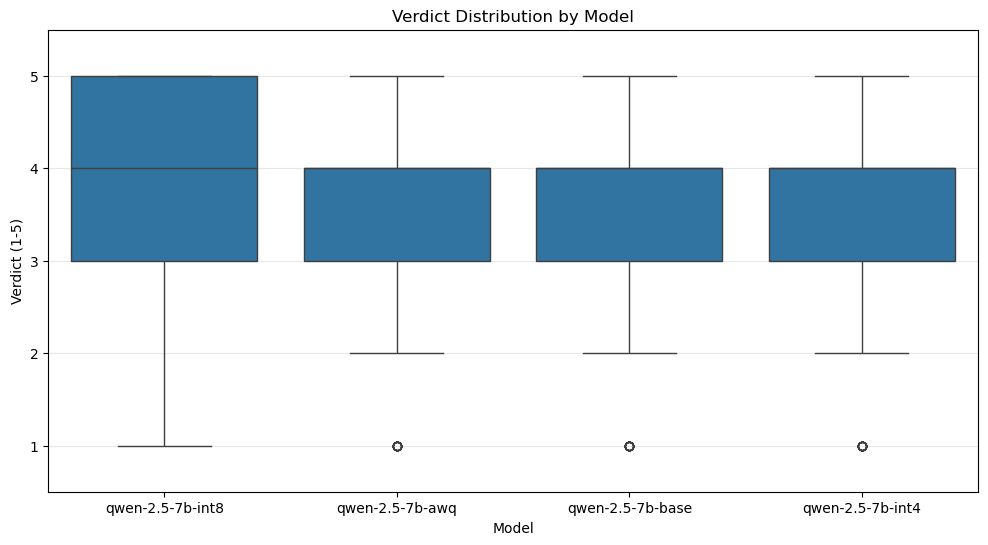

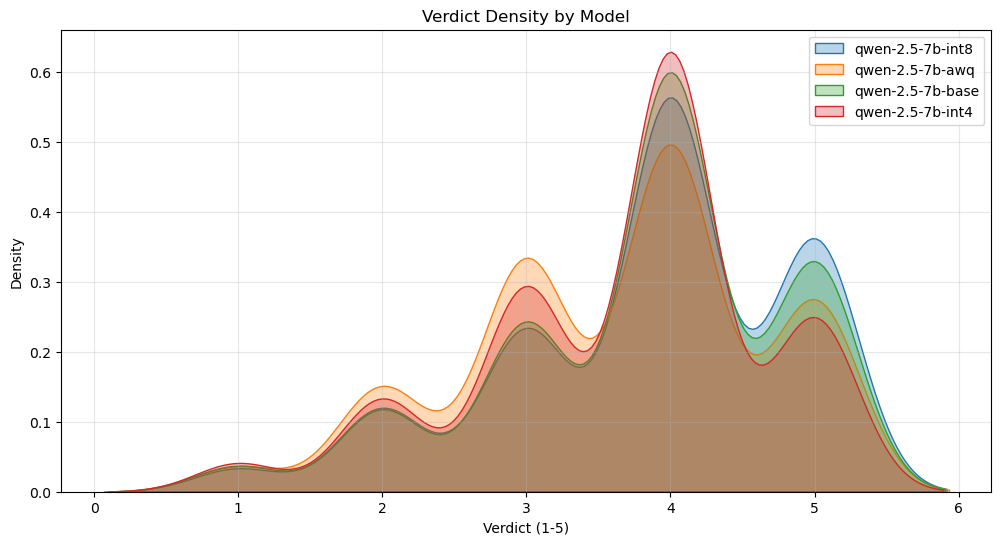

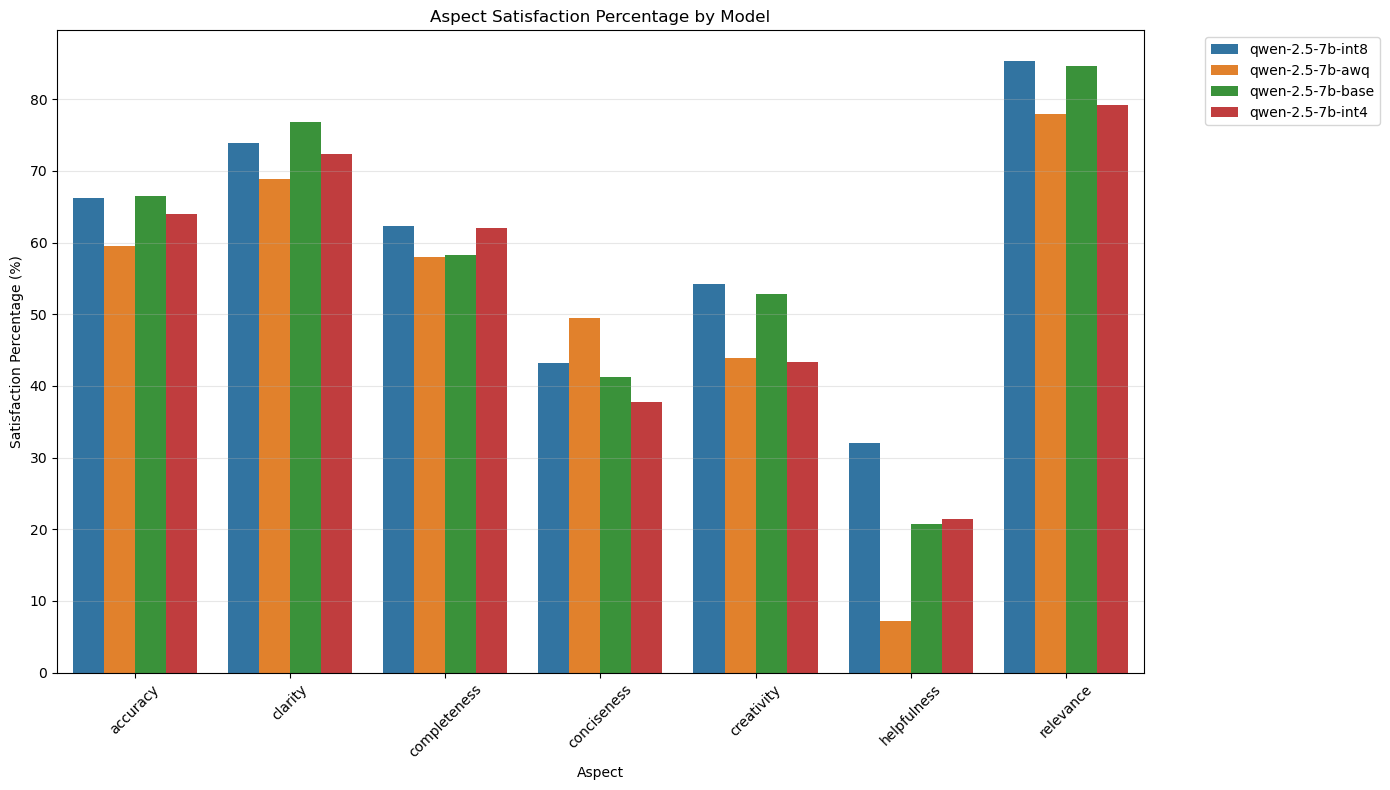

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import defaultdict
import numpy as np

verdict_stats = qwen_markup_data.groupby('model')['verdict'].agg(['mean', 'median', 'std', 'count'])
print("Verdict Statistics:")
print(verdict_stats)

all_aspects = set()
for aspects in qwen_markup_data['aspects']:
    all_aspects.update(aspects.keys())
all_aspects = sorted(all_aspects)

aspect_results = defaultdict(list)

for model in qwen_markup_data['model'].unique():
    model_data = qwen_markup_data[qwen_markup_data['model'] == model]
    
    for aspect in all_aspects:
        total = 0
        satisfied = 0
        
        for aspects_dict in model_data['aspects']:
            if aspect in aspects_dict:
                total += 1
                if aspects_dict[aspect] == "True":
                    satisfied += 1
        
        if total > 0:
            satisfaction = (satisfied / total) * 100
        else:
            satisfaction = np.nan
            
        aspect_results[aspect].append({
            'model': model,
            'satisfaction_pct': satisfaction,
            'total_evaluations': total
        })

# Convert to dataframe
aspect_df = pd.DataFrame.from_dict({
    (aspect, i): aspect_results[aspect][i]
    for aspect in aspect_results
    for i in range(len(aspect_results[aspect]))
}, orient='index')

aspect_df.index = pd.MultiIndex.from_tuples(aspect_df.index)
aspect_df = aspect_df.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'aspect'})

print("\nAspect Satisfaction Percentage:")
print(aspect_df.pivot(index='aspect', columns='model', values='satisfaction_pct'))

# 4. Plot verdict distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=qwen_markup_data, x='model', y='verdict')
plt.title('Verdict Distribution by Model')
plt.ylabel('Verdict (1-5)')
plt.xlabel('Model')
plt.ylim(0.5, 5.5)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Additional density plot
plt.figure(figsize=(12, 6))
for model in qwen_markup_data['model'].unique():
    sns.kdeplot(
        qwen_markup_data[qwen_markup_data['model'] == model]['verdict'],
        label=model,
        fill=True,
        alpha=0.3
    )
plt.title('Verdict Density by Model')
plt.xlabel('Verdict (1-5)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Aspect satisfaction visualization
plt.figure(figsize=(14, 8))
sns.barplot(
    data=aspect_df.dropna(),
    x='aspect',
    y='satisfaction_pct',
    hue='model'
)
plt.title('Aspect Satisfaction Percentage by Model')
plt.ylabel('Satisfaction Percentage (%)')
plt.xlabel('Aspect')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [159]:
from itertools import combinations
from scipy.stats import wilcoxon

# Prepare pairwise comparison data
models = qwen_markup_data['model'].unique()
pairwise_results = []

for model1, model2 in combinations(models, 2):
    # Get common question_ids for fair comparison
    common_questions = set(qwen_markup_data[qwen_markup_data['model'] == model1]['question_id']) & \
                      set(qwen_markup_data[qwen_markup_data['model'] == model2]['question_id'])
    
    # Filter data for these models and common questions
    m1_data = qwen_markup_data[(qwen_markup_data['model'] == model1) & 
                              (qwen_markup_data['question_id'].isin(common_questions))].sort_values('question_id')
    m2_data = qwen_markup_data[(qwen_markup_data['model'] == model2) & 
                              (qwen_markup_data['question_id'].isin(common_questions))].sort_values('question_id')
    
    # Calculate comparison metrics
    wins = sum(m1_data['verdict'].values > m2_data['verdict'].values)
    losses = sum(m1_data['verdict'].values < m2_data['verdict'].values)
    ties = sum(m1_data['verdict'].values == m2_data['verdict'].values)
    total = len(m1_data)
    
    # Wilcoxon signed-rank test for statistical significance
    try:
        stat, pval = wilcoxon(m1_data['verdict'], m2_data['verdict'])
        significant = pval < 0.05
    except:
        stat, pval, significant = np.nan, np.nan, False
    
    pairwise_results.append({
        'model1': model1,
        'model2': model2,
        'wins': wins,
        'losses': losses,
        'ties': ties,
        'win_to_total_rate': wins / total,
        'win_rate': wins / (wins+losses),
        'stat_significant': significant,
        'p_value': pval
    })

# Create pairwise comparison dataframe
pairwise_df = pd.DataFrame(pairwise_results)

# Calculate model rankings
model_scores = defaultdict(int)
for _, row in pairwise_df.iterrows():
    if row['win_rate'] > 0.5:
        model_scores[row['model1']] += 1
        model_scores[row['model2']] += 0
    elif row['win_rate'] < 0.5:
        model_scores[row['model2']] += 1
        model_scores[row['model1']] += 0

# Sort models by their score
ranked_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

print("\nModel Rankings (Best to Worst):")
for i, (model, score) in enumerate(ranked_models, 1):
    print(f"{i}. {model} (Score: {score})")

print("\nDetailed Pairwise Comparisons:")
print(pairwise_df[['model1', 'model2', 'wins', 'losses', 'ties', 'win_rate', 'stat_significant']])


Model Rankings (Best to Worst):
1. qwen-2.5-7b-int8 (Score: 3)
2. qwen-2.5-7b-base (Score: 2)
3. qwen-2.5-7b-int4 (Score: 1)
4. qwen-2.5-7b-awq (Score: 0)

Detailed Pairwise Comparisons:
             model1            model2  wins  losses  ties  win_rate  \
0  qwen-2.5-7b-int8   qwen-2.5-7b-awq   110      52   233  0.679012   
1  qwen-2.5-7b-int8  qwen-2.5-7b-base    53      37   305  0.588889   
2  qwen-2.5-7b-int8  qwen-2.5-7b-int4   101      50   244  0.668874   
3   qwen-2.5-7b-awq  qwen-2.5-7b-base    63     108   224  0.368421   
4   qwen-2.5-7b-awq  qwen-2.5-7b-int4    79      92   224  0.461988   
5  qwen-2.5-7b-base  qwen-2.5-7b-int4    94      59   242  0.614379   

   stat_significant  
0              True  
1             False  
2              True  
3              True  
4             False  
5              True  


In [160]:
# Identify base model and quantized models
base_model = 'qwen-2.5-7b-base'
quant_models = [m for m in models if m != base_model]

aspect_comparisons = []

for q_model in quant_models:
    # Get common questions between base and quantized model
    common_questions = set(qwen_markup_data[qwen_markup_data['model'] == base_model]['question_id']) & \
                      set(qwen_markup_data[qwen_markup_data['model'] == q_model]['question_id'])
    
    # Filter data
    base_data = qwen_markup_data[(qwen_markup_data['model'] == base_model) & 
                               (qwen_markup_data['question_id'].isin(common_questions))].sort_values('question_id')
    quant_data = qwen_markup_data[(qwen_markup_data['model'] == q_model) & 
                                (qwen_markup_data['question_id'].isin(common_questions))].sort_values('question_id')
    
    # Compare aspects
    aspect_changes = defaultdict(lambda: {'improved': 0, 'worsened': 0, 'unchanged': 0})
    
    for base_row, quant_row in zip(base_data.to_dict('records'), quant_data.to_dict('records')):
        base_aspects = base_row['aspects']
        quant_aspects = quant_row['aspects']
        
        for aspect in set(base_aspects.keys()) | set(quant_aspects.keys()):
            if aspect in base_aspects and aspect in quant_aspects:
                base_val = base_aspects[aspect]
                quant_val = quant_aspects[aspect]
                
                # Convert to numerical for comparison (True=2, Partial=1, False=0)
                val_map = {"True": 2, "Partial": 1, "False": 0}
                base_score = val_map.get(base_val, 0)
                quant_score = val_map.get(quant_val, 0)
                
                if quant_score > base_score:
                    aspect_changes[aspect]['improved'] += 1
                elif quant_score < base_score:
                    aspect_changes[aspect]['worsened'] += 1
                else:
                    aspect_changes[aspect]['unchanged'] += 1
    
    # Store results for this quantization
    for aspect, counts in aspect_changes.items():
        aspect_comparisons.append({
            'quant_model': q_model,
            'aspect': aspect,
            'improved': counts['improved'],
            'worsened': counts['worsened'],
            'unchanged': counts['unchanged'],
            'net_change': counts['improved'] - counts['worsened']
        })

# Create aspect comparison dataframe
aspect_comp_df = pd.DataFrame(aspect_comparisons)

print("\nQuantization vs Base Model Aspect Changes:")
for q_model in quant_models:
    print(f"\nComparison: {q_model} vs {base_model}")
    print(aspect_comp_df[aspect_comp_df['quant_model'] == q_model]
          .sort_values('net_change', ascending=False)
          [['aspect', 'improved', 'worsened', 'unchanged', 'net_change']]
          .to_string(index=False))


Quantization vs Base Model Aspect Changes:

Comparison: qwen-2.5-7b-int8 vs qwen-2.5-7b-base
      aspect  improved  worsened  unchanged  net_change
completeness        17        10        168           7
 conciseness        19        13        210           6
  creativity        15        11        104           4
    accuracy         9         7        179           2
 helpfulness         0         0         11           0
   relevance         4         6        170          -2
     clarity        15        20        170          -5

Comparison: qwen-2.5-7b-awq vs qwen-2.5-7b-base
      aspect  improved  worsened  unchanged  net_change
 conciseness        42        26        178          16
 helpfulness         0         2          4          -2
completeness        18        26        150          -8
     clarity        20        32        155         -12
  creativity        17        29         78         -12
   relevance         6        21        156         -15
    accuracy     